In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
var = lambda x: np.mean((x - x.mean())**2)

### 2

In [20]:
n = 50
Y = np.random.normal(0, 1, n)
X = np.exp(Y)
B = 1000
thhat = X.mean()

(array([ 40.,   5.,   2.,   1.,   2.]),
 array([  0.21046394,   2.56476701,   4.91907009,   7.27337316,
          9.62767623,  11.98197931]),
 <a list of 5 Patch objects>)

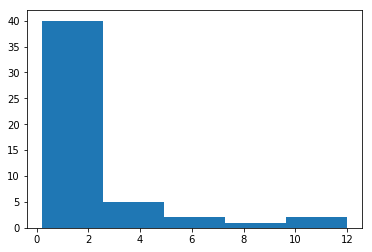

In [21]:
plt.hist(X, bins=5)

In [22]:
TB = []
for _ in range(B):
    XX = np.random.choice(X, size=n, replace=True)
    TB.append(np.mean((XX-XX.mean())**3))
TB = np.array(TB)

In [23]:
se = np.sqrt(var(TB))
print("standard error: ", se)

standard error:  16.979599951


In [36]:
print("Normal interval: ", thhat - 2 * se, thhat + 2 * se)
print("Percentile interval: ", np.percentile(TB, 2.5), np.percentile(TB, 97.5))
print("Pivotal interval: ", 2*thhat-np.percentile(TB, 97.5), 2*thhat+np.percentile(TB, 2.5))

Normal interval:  -31.9818461951 35.9365536089
Percentile interval:  5.36199396058 71.0520588622
Pivotal interval:  -67.0973514483 9.31670137445


### 6

In [9]:
n = 100
X = np.random.normal(5, 1, n)
thetahat = np.exp(X.mean())

In [10]:
B = 1000
thetaB = np.zeros((B, ))
for i in range(B):
    XX = np.random.choice(X, size=n, replace=True)
    thetaB[i] = np.exp(XX.mean())

In [13]:
se = np.sqrt(var(thetaB))
print("estimate of theta: ", thetahat)
print("standard error of theta: ", se)

estimate of theta:  140.035738553
standard error of theta:  14.9659280882


In [30]:
# normal confidence interval
print('normal 95% confidence interval: ({0:3f}, {1:3f})'.format(thetahat - 2*se, thetahat + 2*se))

normal 95% confidence interval: (110.103882, 169.967595)


In [31]:
# percentile
print('percentile 95% confidence interval: ({0:3f}, {1:3f})'.format(np.percentile(thetaB, 2.5), 
                                                                    np.percentile(thetaB, 97.5)))

percentile 95% confidence interval: (114.425900, 171.989002)


In [32]:
# pivotal
print('pivotal 95% confidence interval: ({0:3f}, {1:3f})'.format(2*thetahat - np.percentile(thetaB, 97.5), 
                                                                2*thetahat - np.percentile(thetaB, 2.5)))

pivotal 95% confidence interval: (108.082475, 165.645577)


Text(0.5,1,'Histogram of Bootstrap Replications')

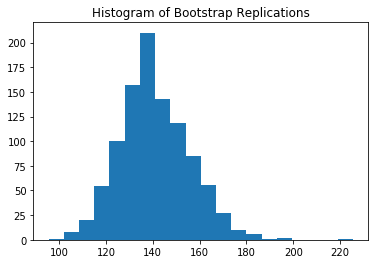

In [35]:
plt.hist(thetaB, bins=20)
plt.title("Histogram of Bootstrap Replications")

Text(0.5,1,'Histogram of True Sampling Distribution')

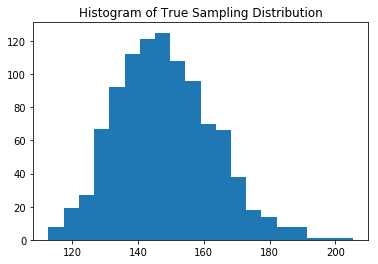

In [37]:
# true sampling distribution of theta
thetatrue = np.zeros((B,))
for i in range(B):
    Xr = np.random.normal(5, 1, n)
    thetatrue[i] = np.exp(Xr.mean())

plt.hist(thetatrue, bins=20)
plt.title("Histogram of True Sampling Distribution")

### 7

Let $X_1, X_2, \cdots, X_n \sim \text{Uniform}(0, \theta)$. Let $\hat \theta = X_{\max} = \max \{X_1, \cdots, X_n \}$.
Find the distribution of $\hat \theta$.

$$
\begin{align}
F_{\hat \theta} (x) &= P(\hat \theta \leq x) \\
&= P(X_{\max} = \max \{X_1, \cdots, X_n \} \leq x) \\ 
&= P(X_1 \leq x \cap X_2 \leq x \cap \cdots \cap X_n \leq x)\\
&= P(X_1 \leq x) \cdots P(X_n \leq x) = x^n
\end{align}
$$
where $x \in [0, 1]$.

Therefore, $$f_{\hat \theta}(x) = n x ^{n-1}$$

Text(0.5,1,'True/Theoretical distribution of theta')

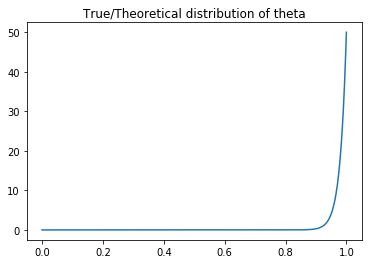

In [9]:
x = np.linspace(0, 1, 1000)
plt.plot(x, 50 * (x ** 49))
plt.title("True/Theoretical distribution of theta")

In [3]:
n = 50
X = np.random.uniform(0, 1, n)
print(X.shape)

(50,)


Text(0.5,1,'True distribution of theta')

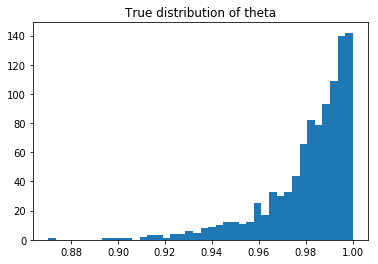

In [5]:
# simulation true distribution of theta = max{X1, X2, ..., Xn}
B = 1000
theta_true = np.zeros((B, ))

for i in range(B):
    Xs = np.random.uniform(0, 1, n)
    theta_true[i] = Xs.max()

plt.hist(theta_true, bins=40)
plt.title("True distribution of theta")

Text(0.5,1,'Bootstrap distribution of theta')

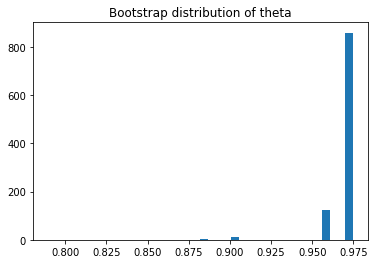

In [6]:
# bootstrap
theta_B = np.zeros((B, ))

for i in range(B):
    Xb = np.random.choice(X, size=n, replace=True)
    theta_B[i] = Xb.max()
    
plt.hist(theta_B, bins=40)
plt.title("Bootstrap distribution of theta")